# 1.Simple Imputer

In [1]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
df2=pd.DataFrame()
df2['Col']=[75,88,np.nan,94,168,np.nan,543]
df2

,Col
0,75.0
1,88.0
2,NaN
3,94.0
4,168.0
5,NaN
6,543.0


In [2]:
#mean
s_mean=SimpleImputer(strategy='mean')
mean=s_mean.fit_transform(df2)
mean

array([[ 75. ],
       [ 88. ],
       [193.6],
       [ 94. ],
       [168. ],
       [193.6],
       [543. ]])

In [6]:
#median
s_median=SimpleImputer(strategy='median')
median=s_median.fit_transform(df2)
median

array([[ 75.],
       [ 88.],
       [ 94.],
       [ 94.],
       [168.],
       [ 94.],
       [543.]])

In [10]:
#most frequent
s_most_frequent=SimpleImputer(strategy='most_frequent')
most_frequent=s_most_frequent.fit_transform(df2)
most_frequent

array([[ 75.],
       [ 88.],
       [ 75.],
       [ 94.],
       [168.],
       [ 75.],
       [543.]])

In [11]:
#constant
con=SimpleImputer(strategy='constant')
constant=con.fit_transform(df2)
constant

array([[ 75.],
       [ 88.],
       [  0.],
       [ 94.],
       [168.],
       [  0.],
       [543.]])

# 2.Dummies

In [12]:
import pandas as pd
df=pd.read_csv('test.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
dummies=pd.get_dummies(df)
dummies.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0


In [20]:
dummies.keys()

Index(['total_bill', 'tip', 'size', 'sex_Female', 'sex_Male', 'smoker_No',
       'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur',
       'time_Dinner', 'time_Lunch'],
      dtype='object')

# 3.OneHotEncoding

In [18]:
from sklearn.preprocessing import OneHotEncoder
oh_enc=OneHotEncoder(sparse=False)
oh_enc

OneHotEncoder(sparse=False)

In [19]:
one_hot_encode=oh_enc.fit_transform(df[['sex','smoker','day','time']])
one_hot_encode

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [25]:
one_hot_encode1=pd.DataFrame(one_hot_encode,columns=[['sex_Female', 'sex_Male', 'smoker_No','smoker_Yes', 'day_Fri', 
                                                     'day_Sat', 'day_Sun', 'day_Thur','time_Dinner', 'time_Lunch']])
one_hot_encode1.head()

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# 4.LabelEncoder

In [28]:
d1=pd.read_csv('iris.csv')
d1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
d1['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
d1['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le

LabelEncoder()

In [32]:
df=le.fit_transform(d1['Species'])
df

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
d1['Species']=le.fit_transform(d1['Species'])
d1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [38]:
d1['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [39]:
d1['Species'].dtypes

dtype('int32')

In [40]:
d1['Species'].unique()

array([0, 1, 2])

# 5.Standardization/Standard Scaler

In [5]:
import pandas as pd
df=pd.read_csv('headbrain.csv')
df.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


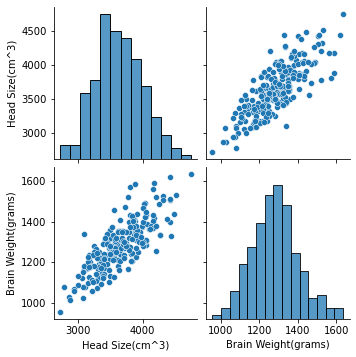

In [6]:
import seaborn as sn
sn.pairplot(data=df)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc

StandardScaler()

In [8]:
df=sc.fit_transform(df)
df

array([[ 2.40886829,  2.0579083 ],
       [ 0.28535333,  0.11763692],
       [ 1.72023489,  0.43407603],
       [ 0.39235214, -0.00727325],
       [ 1.4897759 ,  2.557549  ],
       [-0.13441126,  0.14261896],
       [ 0.41430062,  0.97535345],
       [-0.2057438 , -0.23211156],
       [-0.05759159,  0.60062293],
       [ 0.95478182,  0.76716983],
       [-0.52399669,  0.47571276],
       [ 0.98496097,  0.80880656],
       [ 0.01648451,  0.60062293],
       [ 1.57482624,  1.99128954],
       [ 0.54324791, -0.62349678],
       [ 0.66396452,  1.01699018],
       [-0.37584448,  0.62560497],
       [-0.46089482,  0.0760002 ],
       [-1.47875536,  0.47571276],
       [ 2.16743507,  0.97535345],
       [ 0.66945164,  0.61727762],
       [ 1.13036962,  0.03436347],
       [ 0.46642825, -0.06556467],
       [ 0.20853367, -0.10720139],
       [ 3.05360475,  2.93227952],
       [ 2.16469151,  1.84972468],
       [ 1.10293403,  1.7248145 ],
       [ 1.06452419,  1.68317778],
       [-0.49381754,

# 6.Normalization/MinMaxSclaer

In [9]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms

MinMaxScaler()

In [12]:
df1=mms.fit_transform(df)
df1

array([[0.88406512, 0.84558824],
       [0.50222003, 0.50294118],
       [0.7602368 , 0.55882353],
       [0.52146029, 0.48088235],
       [0.71879625, 0.93382353],
       [0.42673902, 0.50735294],
       [0.52540701, 0.65441176],
       [0.41391219, 0.44117647],
       [0.44055254, 0.58823529],
       [0.62259497, 0.61764706],
       [0.35668476, 0.56617647],
       [0.62802171, 0.625     ],
       [0.45387272, 0.58823529],
       [0.73408979, 0.83382353],
       [0.54859398, 0.37205882],
       [0.57030094, 0.66176471],
       [0.38332511, 0.59264706],
       [0.36803157, 0.49558824],
       [0.18500247, 0.56617647],
       [0.84065121, 0.65441176],
       [0.57128762, 0.59117647],
       [0.65416872, 0.48823529],
       [0.53478046, 0.47058824],
       [0.48840651, 0.46323529],
       [1.        , 1.        ],
       [0.84015787, 0.80882353],
       [0.64923532, 0.78676471],
       [0.64232856, 0.77941176],
       [0.36211149, 0.52205882],
       [0.71780957, 0.68382353],
       [0.